# Import libreries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Github/HM2/

/content/drive/MyDrive/Github/HM2


In [ ]:
import pandas as pd
import numpy as np
import math 
import matplotlib.pyplot as plt

#plt.rcParams['font.sans-serif'] = ['Source Han Sans TW', 'sans-serif']

## Import the mini_data set

In [ ]:
# nrows = 3.000.000 
nrows = 3000000
dataset = pd.read_csv('./steam_reviews.csv', header='infer', nrows = nrows)

In [ ]:
dataset = pd.read_csv('./steam_reviews.csv', header='infer')

## Understand the dataset

In [ ]:
dataset.columns

In [ ]:
dataset.head()

# [RQ2] Let's explore the dataset by finding simple insights into the reviews

## [RQ2.1] plot the number of reviews for each application in descending order

I'm creating a dataframeGroupby to store information for each application

In [ ]:
app_group = dataset.groupby("app_name")

Counting the number of reviews for each group/application. Plot the application in descending order in a logarithmic scale for visibility pourpose

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 40857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 23830 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 65290 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 19977 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22269 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 32676 missing from current font.
  font.set_

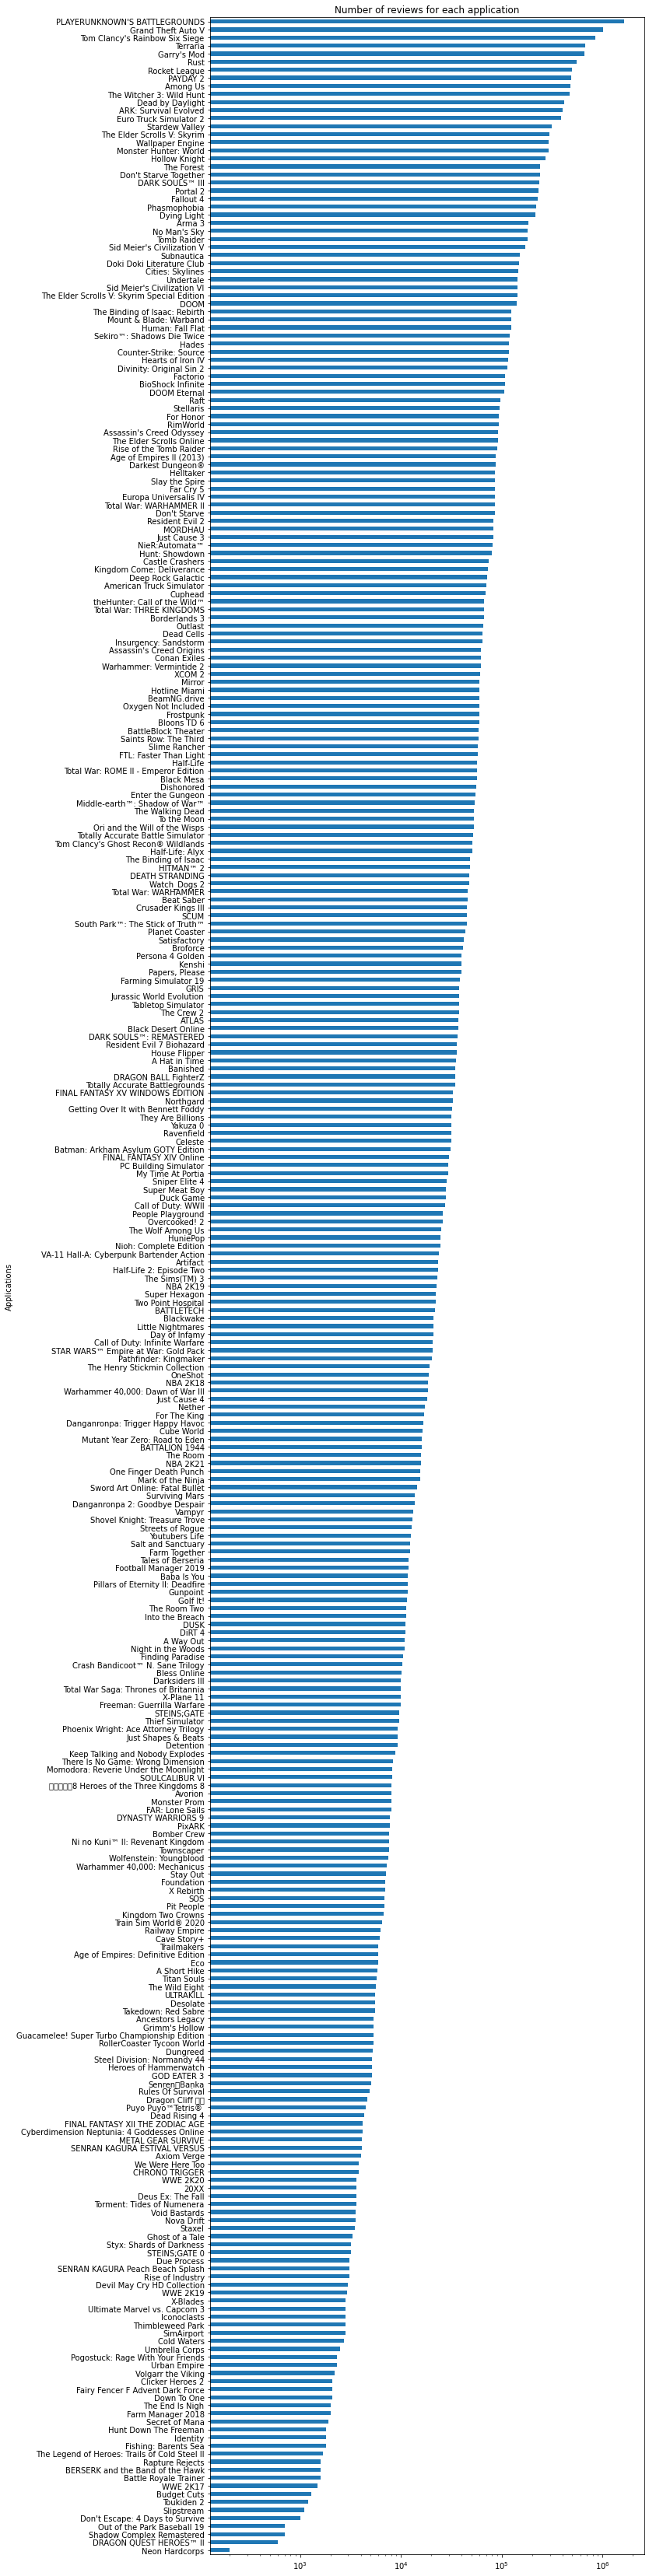

In [ ]:
review_appcount = app_group["review"].count().sort_values(ascending=True)

review_appcount.plot(kind = "barh", title = "Number of reviews for each application", xlabel = "Applications",
         ylabel = "Number of reviews", figsize=(10, 60), logx = True)
plt.show()

## [RQ2.2] What applications have the best Weighted Vote Score?

Compute max of each group and taken the best

Output the 5 best to complete view of the best result

In [ ]:
fivemaxscore_app = app_group["weighted_vote_score"].max().nlargest(5)
print(fivemaxscore_app)

app_name
Stardew Valley              0.995987
Divinity: Original Sin 2    0.995245
Subnautica                  0.994453
Mirror                      0.994038
Wallpaper Engine            0.993540
Name: weighted_vote_score, dtype: float64


In [ ]:
maxscore_app = list(fivemaxscore_app.index)[0]
print(maxscore_app)

Stardew Valley


The application with the best Weighted Vote Score is: __Stardew Valley__ with __0.995987__ of score.

Second is __Divinity: Original Sin 2__ with  __0.995245__ of score, and third is __Subnautica__  with __0.994453__ of score.

## [RQ2.3] Which applications have the most and the least recommendations?

"Recommended" is boolean type (True = 1, False = 0). If we sum over each group by recommended value, we can take the most and the least recommendated app

In [ ]:
recommended_app = app_group["recommended"].sum().sort_values(ascending=False)

In [ ]:
print("The best recommended app is:\n", recommended_app.head(2),"\n")
print("The least recommended app is:\n", recommended_app.tail(2))

The best recommended app is:
 app_name
PLAYERUNKNOWN'S BATTLEGROUNDS    886417
Grand Theft Auto V               831311
Name: recommended, dtype: int64 

The least recommended app is:
 app_name
DRAGON QUEST HEROES™ II    423
Neon Hardcorps              89
Name: recommended, dtype: int64


The best recommended app is __PLAYERUNKNOWN'S BATTLEGROUNDS__.

The least recommended app is __Neon Hardcorps__

## [RQ2.4] How many of these applications were purchased, and how many were given for free?


Purchased and given for free are booleans ( True = 1, False = 0). If we sum over each group by purchase (or received for free) value we can count how many

In [ ]:
# getting keys of groupby best and least recommended app
best_app = recommended_app.head(1).index[0]
least_app = recommended_app.tail(1).index[0]

In [ ]:
how_many_purchase_bestapp = app_group["steam_purchase"].get_group(best_app).sum()
how_many_free_bestapp = app_group["received_for_free"].get_group(best_app).sum()

In [ ]:
how_many_purchase_leastapp = app_group["steam_purchase"].get_group(least_app).sum()
how_many_free_leastapp = app_group["received_for_free"].get_group(least_app).sum()

In [ ]:
print("How many were purchased?\n", best_app, ": ",how_many_purchase_bestapp,"\n",least_app, ": ",how_many_purchase_leastapp)
print("\nHow many were given for free?\n", best_app, ": ",how_many_free_bestapp,"\n",least_app, ": ",how_many_free_leastapp)

How many were purchased?
 PLAYERUNKNOWN'S BATTLEGROUNDS :  1372721 
 Neon Hardcorps :  29

How many were given for free?
 PLAYERUNKNOWN'S BATTLEGROUNDS :  61443 
 Neon Hardcorps :  27


In [ ]:
df = pd.DataFrame([[how_many_purchase_bestapp,how_many_purchase_leastapp],[how_many_free_bestapp,how_many_free_leastapp]],
                  index = [best_app, least_app],
                  columns = ["Purchase","Given for free"])
df.style

,Purchase,Given for free
PLAYERUNKNOWN'S BATTLEGROUNDS,1372721,29
Neon Hardcorps,61443,27


# [RQ4] As Steam is a worldwide platform, the reviews can be done in many languages. Let's extract some information about it.

## [RQ4.1] What are the top 3 languages used to review applications?

Each review is writting in one languages, so we groupby language and count the occurencies of the language for each group

In [ ]:
n = 3

top_languages = dataset.groupby("language")["language"].count().sort_values(ascending = False)

In [ ]:
top_languages[:3]

language
english     9635437
schinese    3764967
russian     2348900
Name: language, dtype: int64

In [ ]:
top3_languages = list(top_languages[:3].index)
print(top3_languages)

['english', 'schinese', 'russian']


The top 3 languages used to review applications are:

__1:__ __english__ with 9635437 reviews <br>
__2:__ __schinese__ with 3764967 reviews<br>
__3:__ __russian__ with 2348900 reviews

## [RQ4.2] Create a function that receives as parameters both the name of a data set and a list of languages’ names and returns a data frame filtered only with the reviews written in the provided languages

In [ ]:
def filtered_language_reviews(dataset, languages):
    return dataset[dataset.language.isin(languages)]

## [RQ4.3] Use the function created in the previous literal to find what percentage of these reviews (associated with the top 3 languages) were voted as funny?

In the columns _funny_ and _helpful_ there is the number of steam account that voted that specific reviews as funny or helpful, so for count the number fo voted as funny (or helpful) just count the row of reviews with value > 0 (at least 1 vote)

In [ ]:
filtered_dataset = filtered_language_reviews(dataset, top3_languages)

In [ ]:
total_cases = filtered_dataset.shape[0]  
print(total_cases) 

15749304


In [ ]:
fav_cases = filtered_dataset[filtered_dataset["votes_funny"] > 0].shape[0]
print(fav_cases)

1922726


In [ ]:
percent_funny_reviews = 100*fav_cases/total_cases
print("{:.2f}%".format(percent_funny_reviews))

12.21%


The percentage of reviews wrote with the 3 top langauages voted as funny is: __12.21%__   (1922726/15749304)

## [RQ4.4] Use the function created in the literal “a” to find what percentage of these reviews (associated with the top 3 languages) were voted as helpful?

In [ ]:
fav_cases = filtered_dataset[filtered_dataset["votes_helpful"] > 0].shape[0]
print(fav_cases)

4592926


In [ ]:
percent_helpful_reviews = 100*fav_cases/total_cases
print("{:.2f}%".format(percent_helpful_reviews))

29.16%


The percentage of reviews wrote with the 3 top langauages voted as funny is: __29.16%__  (4592926/15749304)

# [RQ5] The reviews' authors are users from the game that provide their opinion on it. Now you can check how often they make reviews.

## [RQ5.1] Plot the top 10 most popular reviewers and the number of reviews

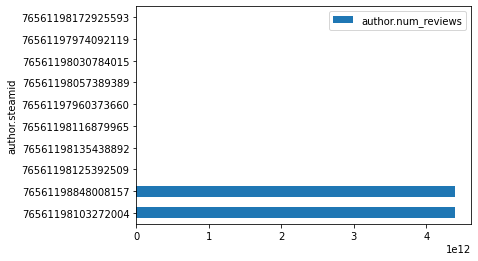

In [ ]:
dataset_top10_reviewers = dataset.sort_values(["author.num_reviews"], ascending = False).groupby("author.steamid").head(1)[:10]
dataset_top10_reviewers.plot.barh(x = "author.steamid", y = "author.num_reviews")
plt.show()

__Another interpretation__ of the question is: for each steam_id (i.e. person) how many reviews did he do in the csv dataset? 
(In the previous interpretation we try to sort in the total of the review for each account)

In [ ]:
reviewer_group_top10 = dataset.groupby("author.steamid")["review"].count().nlargest(10)

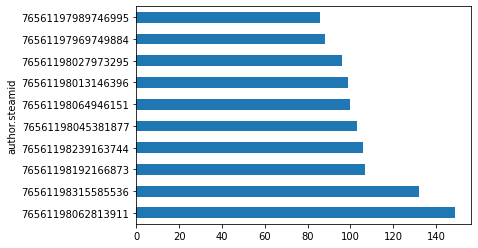

In [ ]:
reviewer_group_top10.plot.barh(x = "author.steamid", y = "author.num_reviews")
plt.show()

## [RQ5.2] What applications did the most popular author review?

We take the steam_id of the top reviewer, than take the dataset of that person

In [ ]:
steam_id_top_reviewer = list(dataset_top10_reviewers["author.steamid"].head(1))[0]
#steam_id_top_reviewer

In [ ]:
top_reviewer_dataset = dataset[dataset["author.steamid"] == steam_id_top_reviewer].copy()
#top_reviewer_dataset

In [ ]:
app_top_reviewer = top_reviewer_dataset["app_name"]
for app in list(app_top_reviewer):
    print("{}\n".format(app))

Grand Theft Auto V



##### According to second interpretation:

In [ ]:
steam_id_top_reviewer2 = list(reviewer_group_top10.head(1).index)[0]
steam_id_top_reviewer2

76561198062813911

In [ ]:
top_reviewer_dataset2 = dataset[dataset["author.steamid"] == steam_id_top_reviewer2].copy()
#top_reviewer_dataset2

In [ ]:
app_top_reviewer2 = top_reviewer_dataset2["app_name"]

The list of the applications the most popular author reviews:

In [ ]:
for app in app_top_reviewer2:
    print("{}\n".format(app))


Half-Life

Counter-Strike: Source

Half-Life 2: Episode Two

Portal 2

Garry's Mod

Sid Meier's Civilization V

Dead by Daylight

Sid Meier's Civilization VI

Subnautica

Human: Fall Flat

Banished

Celeste

Getting Over It with Bennett Foddy

A Hat in Time

The Forest

Axiom Verge

The Binding of Isaac: Rebirth

To the Moon

Cave Story+

Titan Souls

Super Meat Boy

Don't Escape: 4 Days to Survive

Volgarr the Viking

Enter the Gungeon

Salt and Sanctuary

Hollow Knight

The End Is Nigh

Factorio

RimWorld

Insurgency: Sandstorm

Euro Truck Simulator 2

Foundation

Kenshi

Into the Breach

Warhammer: Vermintide 2

DOOM Eternal

Age of Empires: Definitive Edition

Void Bastards

Stardew Valley

Among Us

Blackwake

Little Nightmares

Bomber Crew

Rust

HITMAN™ 2

Phasmophobia

Mount & Blade: Warband

Resident Evil 2

Slime Rancher

Hotline Miami

Tomb Raider

BattleBlock Theater

Dishonored

South Park™: The Stick of Truth™

Undertale

Don't Starve

Rocket League

Dead Cells

Broforce


## [RQ5.3] How many applications did he purchase, and how many did he get as free? Provide the number (count) and the percentage.

Purchase and free is a Bolean so,...

In [ ]:
total_cases = top_reviewer_dataset.shape[0] 

In [ ]:
number_of_purchase = top_reviewer_dataset["steam_purchase"].sum()
number_of_free = top_reviewer_dataset["received_for_free"].sum()

In [ ]:
percent_of_purchase = 100*number_of_purchase/total_cases
percent_of_free = 100*number_of_free/total_cases

In [ ]:
print("{:.2f}%".format(percent_of_purchase),"\n","{:.2f}%".format(percent_of_free))
print("\n\n",number_of_purchase,"\n",number_of_free)

100.00% 
 0.00%


 1 
 0


In [ ]:
written_in_EA = top_reviewer_dataset["written_during_early_access"].sum()
written_in_EA

0

In [ ]:
print(top_reviewer_dataset[top_reviewer_dataset.steam_purchase == True].shape[0])

1


__Second interpretation__

In [ ]:
total_cases = top_reviewer_dataset2.shape[0] 
total_cases

149

In [ ]:
number_of_purchase = top_reviewer_dataset2["steam_purchase"].sum()
number_of_free = top_reviewer_dataset2["received_for_free"].sum()

In [ ]:
#top_reviewer_dataset2[top_reviewer_dataset2.steam_purchase == False].shape[0]

In [ ]:
percent_of_purchase = 100*number_of_purchase/total_cases
percent_of_free = 100*number_of_free/total_cases

In [ ]:
print("{:.2f}%".format(percent_of_purchase),"\n","{:.2f}%".format(percent_of_free))
print("\n\n",number_of_purchase,"\n",number_of_free)

73.83% 
 2.68%


 110 
 4


In [ ]:
written_in_EA = top_reviewer_dataset2["written_during_early_access"].sum()
written_in_EA

16

Among the applications he reviews in that period of time, the most popular author purchased __110__ of this applications and __4__ were given for free.
Some application he reviews didn't bought either taken free but the author did review during early access for a total of __16__ applications.

## [RQ5.4] How many of the applications he purchased reviewed positively, and how many negatively? How about the applications he received for free?

#### First interpretation

In [ ]:
purchase_app = top_reviewer_dataset[top_reviewer_dataset.steam_purchase == True]
free_app = top_reviewer_dataset[top_reviewer_dataset.received_for_free == True]

In [ ]:
number_of_pur_pos = purchase_app[purchase_app.recommended == True].shape[0]
number_of_pur_pos

1

In [ ]:
number_of_pur_neg = purchase_app[purchase_app.recommended == False].shape[0]
number_of_pur_neg

0

In [ ]:
number_of_free_pos = free_app[free_app.recommended == True].shape[0]
number_of_free_pos

0

In [ ]:
number_of_free_neg = free_app[free_app.recommended == False].shape[0]
number_of_free_neg

0

#### Second interpretation

In [ ]:
purchase_app2 = top_reviewer_dataset2[top_reviewer_dataset2.steam_purchase == True]
free_app2 = top_reviewer_dataset2[top_reviewer_dataset2.received_for_free == True]

In [ ]:
#purchase_app2

In [ ]:
number_of_pur_pos2 = purchase_app2[purchase_app2.recommended == True].shape[0]
number_of_pur_pos2

108

In [ ]:
number_of_pur_neg2 = purchase_app2[purchase_app2.recommended == False].shape[0]
number_of_pur_neg2

2

In [ ]:
number_of_free_pos2 = free_app2[free_app2.recommended == True].shape[0]
number_of_free_pos2

4

In [ ]:
number_of_free_neg2 = free_app2[free_app2.recommended == False].shape[0]
number_of_free_neg2

0

Among the __110__ application purchased they reviews he:<br>
give positive recommendation: to __108__ of them<br>
give negative recommendation: to __2__ of them


Among the __4__ application purchased they reviews he:<br>
give positive recommendation: to __4__ of them<br>
give negative recommendation: to __0__ of them



# TQ2: 

%%latex 

First of all we need to assume that $n < len(a)$ and $n > 0$. The first assumption is becasue if $n \geq len(a)$ the function goes out of index range in access the element of the array a in the function swapList. 
The second is just for working reason: the function swap the list so $n = \text{"first n index to be swapped in the array"}$ so we might want to have input n to be positive. If negative is ok either. 

This function swapList is a $\mathcal{O}(\frac{2}{3}n)$ because we have a:
\begin{equation*}
    \sum_{i=0}^{n/2} (\Theta(1) + \Theta(1) +  
    \Theta(1) ) = (\frac{n}{2}+1)(3\Theta(1)) = \Theta(\frac{3}{2}n)
\end{equation*}

Take $T(n)$ the running cost equation of the function splitSwap. First of all is a recursive function so we identify the base cases: $T(n=0)=T(n=1)=\Theta(1)$.

The function:
\begin{equation*}
    T(n) = T(n/2)+T(n/2)+\Theta(\frac{3}{2}n) = 2T(n/2)+\Theta(\frac{3}{2}n) 
\end{equation*}
Now we resolve the function iterating over:
\begin{align*}
    T(n) &= 2T(\frac{n}{2})+\Theta(\frac{3}{2}n)\\
        &= 2\bigg[ 2T(\frac{\frac{n}{2}}{2})+\Theta(\frac{3}{2}\frac{n}{2})\bigg] +\Theta(\frac{3}{2}n)
        = 2^2T(\frac{n}{2^2}) + 2\Theta(\frac{3}{2}n)\\
        &= 2^2\bigg[ 2T(\frac{\frac{n}{2^2}}{2}) +\Theta(\frac{3}{2}\frac{n}{2^2})\bigg] + 2\Theta(\frac{3}{2}n)
        = 2^3T(\frac{n}{2^3})+ 3\Theta(\frac{3}{2}n)\\
        &= \ldots = \\
        &= 2^kT(\frac{n}{2^k})+k\Theta(\frac{3}{2}n)\\
        &= \text{stop in $\frac{n}{2^k}=1 \xrightarrow{} k = \log(n)$}\\
        &= nT(1) + \log(n)\Theta(\frac{3}{2}n)\\
        &= \Theta(n) + \Theta(\frac{3}{2}n\log(n))\\
        &= \Theta(\frac{3}{2}n\log(n))
\end{align*}